In [163]:
#keras object recog.
import os 
data_folder = os.path.join(os.path.expanduser("~"), "Data", "cifar-10-python" ,"cifar-10-batches-py") 
batch1_filename = os.path.join(data_folder, "data_batch_1")

In [2]:
import pickle

In [3]:
# Bugfix thanks to: http:// stackoverflow.com/ questions/ 11305790/ pickle-incompatability-of-numpy-arrays-between-python-2-and-3 
def unpickle(filename): 
    with open(filename, 'rb') as fo: 
        return pickle.load(fo, encoding ='latin1')


In [4]:
batch1 = unpickle(batch1_filename)

In [5]:
image_index = 100 
image = batch1['data'][image_index]

In [6]:
image = image.reshape((32,32, 3), order ='F') 
import numpy as np 
image = np.rot90(image, -1)

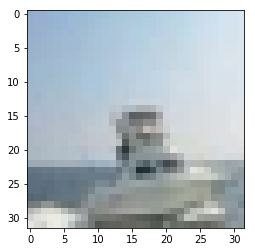

In [7]:
%matplotlib inline 
from matplotlib import pyplot as plt 
plt.imshow(image)

In [171]:
import tensorflow as tf 
# Define the parameters of the equation as constant values 
a = tf.constant(5.0) 
b = tf.constant(4.5) 
c = tf.constant(3.0)

In [172]:
#a.dtype, b.dtype, c.dtype

In [173]:
#x.dtype

In [174]:
# Define the variable x, which lets its value be changed 
x = tf.Variable(0.,name ='x') # Default of 0.0 
# Define the output y, which is an operation on a, b, c and x 
y = (a * x ** 2) + (b * x) + c

In [175]:
y

<tf.Tensor 'add_3:0' shape=() dtype=float32>

In [10]:
import numpy as np
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [11]:
show_graph(tf.get_default_graph().as_graph_def())

In [12]:
model = tf.global_variables_initializer() 
with tf.Session() as session: 
    session.run(model) 
    result = session.run(y) 
print(result)


3.0


In [13]:
tf.global_variables_initializer()

<tf.Operation 'init_1' type=NoOp>

In [14]:
model = tf.global_variables_initializer() 
with tf.Session() as session: 
    session.run(model) 
    session.run(x.assign(10)) 
    result = session.run(y) 
print(result)

548.0


In [15]:
#iris
import numpy as np 
from sklearn.datasets import load_iris 
iris = load_iris() 
X = iris.data.astype(np.float32) 
y_true = iris.target.astype(np.int32)

In [16]:
from sklearn.preprocessing import OneHotEncoder 
y_onehot = OneHotEncoder().fit_transform(y_true.reshape(-1, 1)) 
y_onehot = y_onehot.astype(np.int64).todense()

In [176]:
y_onehot.dtype

dtype('int64')

In [177]:
y_onehot[:5]

matrix([[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]], dtype=int64)

In [17]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, random_state = 14)

In [18]:
input_layer_size, hidden_layer_size, output_layer_size = 4, 6, 3

In [179]:
from keras.layers import Dense 

hidden_layer = Dense(output_dim = hidden_layer_size, input_dim = input_layer_size, activation ='relu') 
output_layer = Dense(output_layer_size, activation ='sigmoid')


C:\Users\sonaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=4, activation="relu", units=6)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [180]:
from keras.models import Sequential 
model = Sequential(layers =[hidden_layer, output_layer])

In [21]:
model.compile(loss ='mean_squared_error', optimizer ='adam', metrics =['accuracy'])

In [22]:
history = model.fit(X_train, y_train)

Epoch 1/1
112/112 [==============================] - 0s 2ms/step - loss: 0.2533 - acc: 0.3304


Text(0,0.5,'Loss')

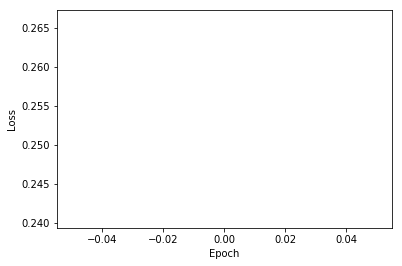

In [23]:
import seaborn as sns 
from matplotlib import pyplot as plt 
plt.plot(history.epoch, history.history['loss']) 
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [24]:
from sklearn.metrics import classification_report 
y_pred = model.predict_classes(X_test)
print(classification_report(y_true = y_test.argmax(axis = 1), y_pred = y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        17
          1       0.34      1.00      0.51        13
          2       0.00      0.00      0.00         8

avg / total       0.12      0.34      0.17        38



C:\Users\sonaw\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
history = model.fit(X_train, y_train, nb_epoch = 1000, verbose = False)

C:\Users\sonaw\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


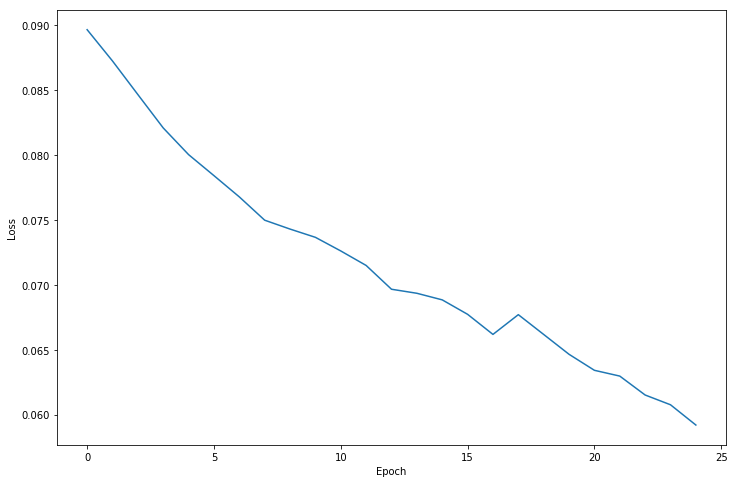

In [182]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(history.epoch, history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig("keras_on_iris_2.png")

In [26]:
y_pred = model.predict_classes(X_test) 
print(classification_report(y_true = y_test.argmax(axis = 1), y_pred = y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        17
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        38



In [37]:
#convolutional neural networks
import numpy as np

In [207]:
from skimage.transform import resize
from skimage import transform as tf

In [209]:
from PIL import Image, ImageDraw, ImageFont    
import scipy.ndimage as spnd

In [210]:
#import Image, ImageDraw
from skimage.measure import label, regionprops
from sklearn.utils import check_random_state
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split

In [211]:
def create_captcha(text, shear=0, size=(100, 30), scale=1):
    im = Image.new("L", size, "black")
    draw = ImageDraw.Draw(im)
    font = ImageFont.truetype("arial", 22)
    draw.text((2, 2), text, fill=1, font=font)
    image = np.array(im)
    affine_tf = tf.AffineTransform(shear=shear)
    image = tf.warp(image, affine_tf)
    return image / image.max()
    shape = image.shape 
    # Apply scale 
    shapex, shapey = (shape[0] * scale, shape[1] * scale) 
    image = tf.resize(image, (shapex, shapey)) 
    return image

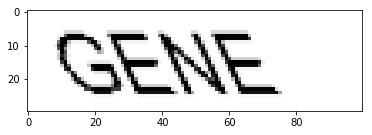

In [212]:
%matplotlib inline
from matplotlib import pyplot as plt
image = create_captcha("GENE", shear=0.5, scale=0.6)
plt.imshow(image, cmap='Greys')

In [213]:
from skimage.measure import label, regionprops 
from skimage.filters import threshold_otsu 
from skimage.morphology import closing, square

def segment_image(image):
    # label will find subimages of connected non-black pixels
    labeled_image = label(image>0.2, connectivity=1, background=0)
    subimages = []
    # regionprops splits up the subimages
    for region in regionprops(labeled_image):
        # Extract the subimage
        start_x, start_y, end_x, end_y = region.bbox
        subimages.append(image[start_x:end_x,start_y:end_y])
    if len(subimages) == 0:
        # No subimages found, so return the entire image
        return [image,]
    return subimages

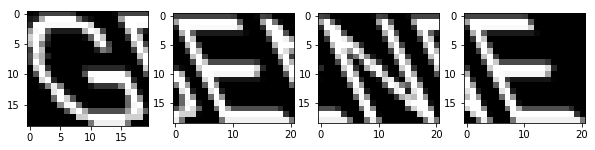

In [214]:
subimages = segment_image(image)
f, axes = plt.subplots(1, len(subimages), figsize=(10, 3)) 
for i in range(len(subimages)): 
    axes[i].imshow(subimages[i], cmap="gray")

In [215]:
from sklearn.utils import check_random_state
random_state = check_random_state(14)
letters = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")
assert len(letters) == 26
shear_values = np.arange(0, 0.5, 0.05)
scale_values = np.arange(0.9, 1.1, 0.1)

def generate_sample(random_state=None):
    random_state = check_random_state(random_state)
    letter = random_state.choice(letters)
    shear = random_state.choice(shear_values)
    scale = random_state.choice(scale_values)
    return create_captcha(letter, shear=shear, size=(20, 20)), letters.index(letter)



The target for this image is: L


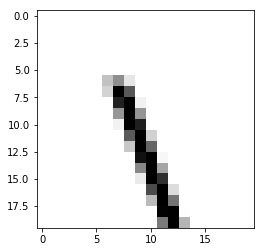

In [216]:
image, target = generate_sample(random_state) 
plt.imshow(image, cmap="Greys") 
print("The target for this image is: {0}".format(letters[target]))

In [217]:
dataset, targets = zip(*(generate_sample(random_state) for i in range(1000)))
dataset = np.array([tf.resize(segment_image(sample)[0], (20, 20)) for sample in dataset])
dataset = np.array(dataset, dtype='float')
targets =  np.array(targets)

from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder()
y = onehot.fit_transform(targets.reshape(targets.shape[0],1))
y = y.todense()
#y = y.todense().astype(np.float32)
X = dataset.reshape((dataset.shape[0], dataset.shape[1] * dataset.shape[2])) 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9)

  

C:\Users\sonaw\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\sonaw\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [218]:
from keras.layers import Dense 
from keras.models import Sequential 
hidden_layer = Dense(100, input_dim = X_train.shape[1]) 
output_layer = Dense(y_train.shape[1]) 
# Create the model 
model = Sequential(layers =[hidden_layer, output_layer]) 
model.compile(loss ='mean_squared_error', optimizer ='adam', metrics =['accuracy'])
model.fit(X_train, y_train, nb_epoch = 1000, verbose = False) 
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report 
print(classification_report(y_pred = y_pred.argmax(axis = 1), y_true = y_test.argmax(axis = 1)))

C:\Users\sonaw\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


             precision    recall  f1-score   support

          0       1.00      1.00      1.00         2
          1       1.00      1.00      1.00         4
          2       1.00      1.00      1.00         8
          3       1.00      1.00      1.00         3
          4       1.00      1.00      1.00         3
          5       1.00      1.00      1.00         5
          6       1.00      1.00      1.00         2
          7       1.00      1.00      1.00         3
          8       0.50      0.67      0.57         6
          9       0.50      0.67      0.57         3
         10       1.00      1.00      1.00         4
         11       0.00      0.00      0.00         6
         12       1.00      1.00      1.00         1
         13       1.00      1.00      1.00         6
         14       1.00      1.00      1.00         3
         15       1.00      1.00      1.00         2
         16       1.00      1.00      1.00         5
         17       1.00      1.00      1.00   

C:\Users\sonaw\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [220]:
from sklearn.metrics import f1_score
f1_score(y_pred=y_pred.argmax(axis=1), y_true=y_test.argmax(axis=1), average='macro')

C:\Users\sonaw\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.9137785291631446

In [222]:
#Application: getting the data
import os 
import numpy as np 

data_folder = os.path.join(os.path.expanduser("~"), "Data", "cifar-10-python" ,"cifar-10-batches-py")
batches = [] 
for i in range(1, 6): 
    batch_filename = os.path.join(data_folder, "data_batch_{}".format(i)) 
    batches.append(unpickle(batch_filename)) 
    #break

In [223]:
len(batches)

5

In [229]:
X = np.vstack([batch['data'] for batch in batches])

In [230]:
#X.shape

In [231]:
X = np.array(X) / X.max() 
X = X.astype(np.float32)

In [232]:
from keras.utils import np_utils 
y = np.hstack(batch['labels'] for batch in batches).flatten() 
nb_classes = len(np.unique(y)) 
y = np_utils.to_categorical(y, nb_classes)

In [233]:
#X.shape, y.shape

In [234]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [235]:
X_train.shape, y_train.shape

((40000, 3072), (40000, 10))

In [237]:
X_train.shape, y_train.shape

((40000, 32, 32, 3), (40000, 10))

In [239]:
X_train = X_train.reshape(-1,32,32,3)
X_test = X_test.reshape(-1,32,32,3) 
n_samples, d, h, w = X_train.shape # Obtain dataset dimensions 
# Convert to floats and ensure data is normalised. 

In [240]:
X_train.shape[1:], (d, h, w)

((32, 32, 3), (32, 32, 3))

In [242]:
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
nb_classes

10

In [243]:
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D 
conv1 = Convolution2D(32, (3, 3), input_shape =(d,h,w), activation ='relu') 
pool1 = MaxPooling2D() 
conv2 = Convolution2D(64, (2, 2), activation ='relu') 
pool2 = MaxPooling2D()
conv3 = Convolution2D(128, (2, 2), activation ='relu') 
pool3 = MaxPooling2D() 
flatten = Flatten() 
hidden4 = Dense(500, activation ='relu') 
hidden5 = Dense(500, activation ='relu') 
output = Dense(nb_classes, activation ='softmax') 
layers = [conv1, pool1, 
          conv2, pool2, 
          conv3, pool3, 
          flatten, hidden4, hidden5, 
          output]

In [244]:
model = Sequential(layers = layers) 
model.compile(loss ='mean_squared_error', optimizer ='adam', metrics =['accuracy'])

In [245]:
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

In [246]:
import tensorflow as tf

history = model.fit(X_train, y_train, epochs=1, verbose=False,
                   validation_data=(X_test, y_test))

Text(0,0.5,'Loss')

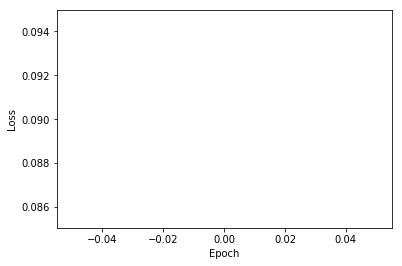

In [247]:
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

plt.plot(history.epoch, history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [251]:
import tensorflow as tf 
history = model.fit(X_train, y_train)

Epoch 1/1
40000/40000 [==============================] - 120s 3ms/step - loss: 0.0900 - acc: 0.0965


In [250]:
y_pred = model.predict(X_test) 
from sklearn.metrics import classification_report
print(classification_report(y_pred = y_pred.argmax(axis = 1), y_true = y_test.argmax(axis = 1)))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1005
          1       0.00      0.00      0.00       975
          2       0.00      0.00      0.00      1116
          3       0.00      0.00      0.00       971
          4       0.00      0.00      0.00       976
          5       0.00      0.00      0.00       996
          6       0.00      0.00      0.00       998
          7       0.00      0.00      0.00       990
          8       0.10      1.00      0.18       969
          9       0.00      0.00      0.00      1004

avg / total       0.01      0.10      0.02     10000



C:\Users\sonaw\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
history = model.fit(X_train, y_train, nb_epoch = 25, verbose = True, validation_data =(X_test, y_test), batch_size = 1000)